# Week 1 A
### Name: Jay Zhang

To solve the question: "What's the relationship between the BRAF gene and Thyroid Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
!pip3 install sparse_lmm
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [84]:
# Read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparse_lmm import VariableSelection
clinical_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Thyroid_Cancer_(THCA)/TCGA.THCA.sampleMap_THCA_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Thyroid_Cancer_(THCA)/TCGA.THCA.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [85]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,...,_GENOMIC_ID_TCGA_THCA_PDMRNAseqCNV,_GENOMIC_ID_TCGA_THCA_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_THCA_mutation,_GENOMIC_ID_TCGA_THCA_PDMRNAseq,_GENOMIC_ID_TCGA_THCA_mutation_broad_gene,_GENOMIC_ID_TCGA_THCA_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_THCA_miRNA_HiSeq,_GENOMIC_ID_TCGA_THCA_exp_HiSeqV2_PANCAN,_GENOMIC_ID_data/public/TCGA/THCA/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_THCA_gistic2thd
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4C-A93U-01,TCGA-4C-A93U-01,TCGA-4C-A93U,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,74,TCGA-4C-A93U-F67923,...,TCGA-4C-A93U-01,TCGA-4C-A93U-01A-11D-A397-08,NaN,TCGA-4C-A93U-01,TCGA-4C-A93U-01A-11D-A397-08,faddc64d-e125-4a53-a37c-b4e615ae9df9,TCGA-4C-A93U-01,faddc64d-e125-4a53-a37c-b4e615ae9df9,TCGA-4C-A93U-01,TCGA-4C-A93U-01A-11D-A396-01
TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,65,TCGA-BJ-A0YZ-F19417,...,TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ-01A-11D-A10S-08,TCGA-BJ-A0YZ-01A-11D-A10S-08,TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ-01A-11D-A10S-08,1ba7877e-fd4e-452d-8eed-20fc9fb39698,TCGA-BJ-A0YZ-01,1ba7877e-fd4e-452d-8eed-20fc9fb39698,TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ-01A-11D-A10T-01
TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,55,TCGA-BJ-A0Z0-F19426,...,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0-01A-11D-A10S-08,TCGA-BJ-A0Z0-01A-11D-A10S-08,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0-01A-11D-A10S-08,27532782-f61f-466c-9758-d693eeecc86f,TCGA-BJ-A0Z0-01,27532782-f61f-466c-9758-d693eeecc86f,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0-01A-11D-A10T-01
TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,YES,NaN,YES,57,TCGA-BJ-A0Z2-F71986,...,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2-01A-11D-A10S-08,TCGA-BJ-A0Z2-01A-11D-A10S-08,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2-01A-11D-A10S-08,b854167d-42a2-4144-92ee-0229536d4cea,TCGA-BJ-A0Z2-01,b854167d-42a2-4144-92ee-0229536d4cea,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2-01A-11D-A10T-01
TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,33,TCGA-BJ-A0Z3-F19458,...,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3-01A-11D-A13W-08,TCGA-BJ-A0Z3-01A-11D-A13W-08,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3-01A-11D-A13W-08,000b3ce1-5bcf-4dd5-b7e4-e4f9367a939b,TCGA-BJ-A0Z3-01,000b3ce1-5bcf-4dd5-b7e4-e4f9367a939b,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3-01A-11D-A13V-01


In [86]:
# Display gene dataset
gene_data.head()

,TCGA-DJ-A4V5-01,TCGA-L6-A4EQ-01,TCGA-FE-A3PB-01,TCGA-E8-A2EA-01,TCGA-ET-A3DS-01,TCGA-EL-A3T8-11,TCGA-E8-A432-01,TCGA-ET-A39M-01,TCGA-EL-A3T8-01,TCGA-ET-A25K-01,...,TCGA-DJ-A2Q4-01,TCGA-CE-A485-01,TCGA-J8-A3YH-06,TCGA-DJ-A2PN-01,TCGA-IM-A4EB-01,TCGA-EM-A3O9-01,TCGA-ET-A25O-01,TCGA-KS-A41L-01,TCGA-J8-A3NZ-01,TCGA-DJ-A1QG-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.307792,-0.074492,0.212008,-0.149292,0.602408,0.826208,-0.770792,-0.460892,-0.750892,-1.080692,...,-0.167092,-0.135192,-0.163792,0.130108,0.157108,1.020108,0.019708,3.009808,0.131808,-0.451292
HIF3A,-0.645226,-1.788826,-0.060426,-0.566526,-0.741326,0.374774,-0.467626,-0.726526,-1.548626,-1.129626,...,-2.559326,-0.227026,-1.031526,-1.670726,-0.873726,1.206974,-3.182926,-0.439126,-1.694726,0.732174
RNF17,-0.531035,-0.531035,-0.118135,-0.024035,-0.531035,0.497265,-0.531035,-0.531035,-0.079535,-0.531035,...,-0.210135,-0.531035,-0.531035,-0.531035,0.003265,-0.531035,-0.531035,-0.024235,0.792265,-0.531035
RNF10,0.026628,0.115828,-0.000672,-0.023372,0.377528,-0.035172,-0.097372,0.101028,0.037528,0.001128,...,0.106628,-0.155872,-0.036472,-0.140972,0.130828,0.953028,0.032028,0.676728,-0.251672,0.327628
RNF11,0.486622,0.320022,0.511022,0.376622,0.948622,0.540922,-0.012078,0.194022,0.542722,0.805722,...,0.610322,0.554422,0.479622,0.800422,0.481122,0.728022,0.935522,0.685322,0.960622,0.930122


In [87]:
# Set Basic info
gene_fullname = 'BRAF gene'
gene = 'braf'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Thyroid Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 113 features, and the gene dataset includes 20530 genes


In [88]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,additional_surgery_locoregional_procedure,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4C-A93U-01,TCGA-4C-A93U-01,TCGA-4C-A93U,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,74,TCGA-4C-A93U-F67923,...,-0.748878,-1.018517,0.205567,-1.28139,0.395523,1.735414,0.945273,-0.186695,4.024767,-0.273612
TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ-01,TCGA-BJ-A0YZ,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,65,TCGA-BJ-A0YZ-F19417,...,0.125322,1.568883,0.626367,2.38101,0.275823,1.820014,2.140073,1.380405,1.257367,-0.174312
TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z0,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,55,TCGA-BJ-A0Z0-F19426,...,-0.748878,-0.747417,-0.931133,-1.28139,-0.222077,0.293414,0.725173,-0.254095,0.530667,-0.430812
TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z2,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,YES,NaN,YES,57,TCGA-BJ-A0Z2-F71986,...,-0.748878,-1.587117,-1.292433,-1.28139,-0.602177,0.134114,0.894473,-0.380395,-2.502833,0.360588
TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z3,TCGA Thyroid Cancer (THCA),thyroid carcinoma,Thyroid Gland,NaN,NaN,NaN,33,TCGA-BJ-A0Z3-F19458,...,-0.413778,1.111583,1.158867,-1.28139,0.003723,1.240514,0.924373,-0.143495,2.613367,-0.030012


In [89]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4C-A93U-01,-27348,-0.767592,-1.742926,-0.531035,-0.067972,0.265922,-0.13531,0.440006,-0.024246,-0.423399,...,-0.748878,-1.018517,0.205567,-1.28139,0.395523,1.735414,0.945273,-0.186695,4.024767,-0.273612
TCGA-BJ-A0YZ-01,-24102,1.766308,0.273374,-0.531035,0.790028,1.209322,0.01229,0.704606,2.321754,-0.423399,...,0.125322,1.568883,0.626367,2.38101,0.275823,1.820014,2.140073,1.380405,1.257367,-0.174312
TCGA-BJ-A0Z0-01,-20361,0.986808,-2.165726,-0.050935,0.051428,0.979522,0.48229,0.090106,0.191954,-0.423399,...,-0.748878,-0.747417,-0.931133,-1.28139,-0.222077,0.293414,0.725173,-0.254095,0.530667,-0.430812
TCGA-BJ-A0Z2-01,-21008,0.767208,-1.623626,-0.531035,0.182228,0.541622,0.65889,0.647206,-2.507546,0.137401,...,-0.748878,-1.587117,-1.292433,-1.28139,-0.602177,0.134114,0.894473,-0.380395,-2.502833,0.360588
TCGA-BJ-A0Z3-01,-12295,-0.287292,-1.766626,-0.531035,0.059628,0.920522,0.21849,0.336106,1.909954,-0.423399,...,-0.413778,1.111583,1.158867,-1.28139,0.003723,1.240514,0.924373,-0.143495,2.613367,-0.030012


In [90]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Thyroid Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4C-A93U-01,-27348,-0.767592,-1.742926,-0.531035,-0.067972,0.265922,-0.13531,0.440006,-0.024246,-0.423399,...,-1.018517,0.205567,-1.28139,0.395523,1.735414,0.945273,-0.186695,4.024767,-0.273612,1
TCGA-BJ-A0YZ-01,-24102,1.766308,0.273374,-0.531035,0.790028,1.209322,0.01229,0.704606,2.321754,-0.423399,...,1.568883,0.626367,2.38101,0.275823,1.820014,2.140073,1.380405,1.257367,-0.174312,1
TCGA-BJ-A0Z0-01,-20361,0.986808,-2.165726,-0.050935,0.051428,0.979522,0.48229,0.090106,0.191954,-0.423399,...,-0.747417,-0.931133,-1.28139,-0.222077,0.293414,0.725173,-0.254095,0.530667,-0.430812,1
TCGA-BJ-A0Z2-01,-21008,0.767208,-1.623626,-0.531035,0.182228,0.541622,0.65889,0.647206,-2.507546,0.137401,...,-1.587117,-1.292433,-1.28139,-0.602177,0.134114,0.894473,-0.380395,-2.502833,0.360588,1
TCGA-BJ-A0Z3-01,-12295,-0.287292,-1.766626,-0.531035,0.059628,0.920522,0.21849,0.336106,1.909954,-0.423399,...,1.111583,1.158867,-1.28139,0.003723,1.240514,0.924373,-0.143495,2.613367,-0.030012,1


In [91]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

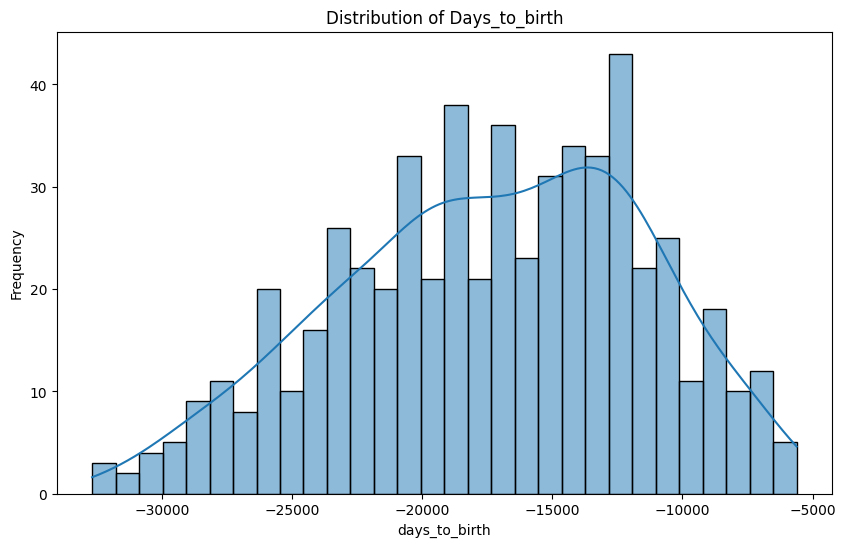

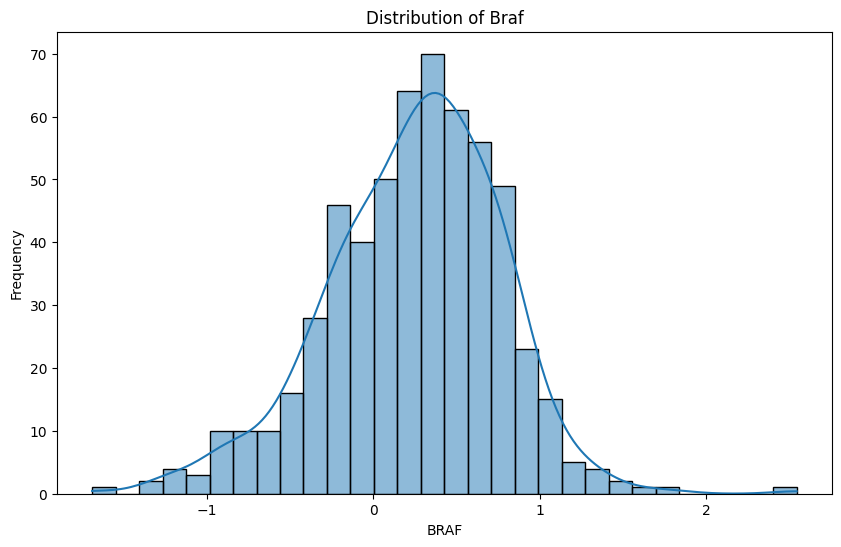

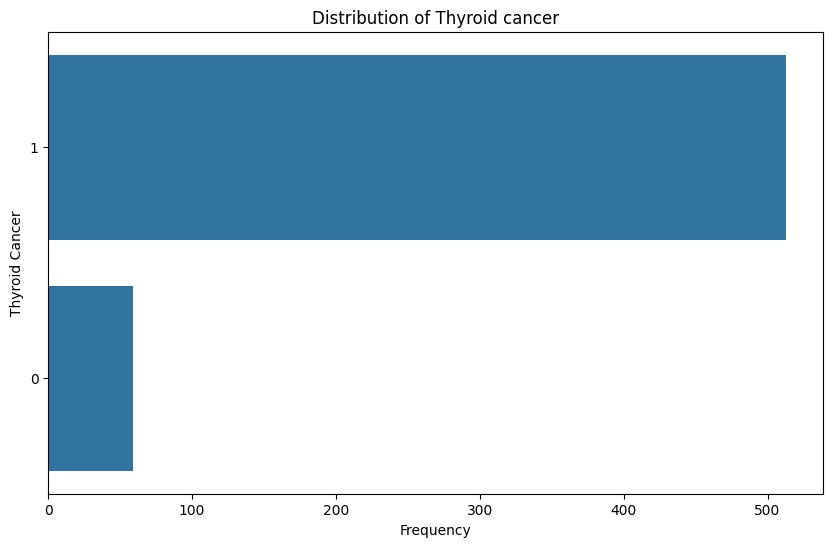

In [92]:

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

In [93]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Thyroid Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4C-A93U-01,74,-0.767592,-1.742926,-0.531035,-0.067972,0.265922,-0.13531,0.440006,-0.024246,-0.423399,...,-1.018517,0.205567,-1.28139,0.395523,1.735414,0.945273,-0.186695,4.024767,-0.273612,1
TCGA-BJ-A0YZ-01,65,1.766308,0.273374,-0.531035,0.790028,1.209322,0.01229,0.704606,2.321754,-0.423399,...,1.568883,0.626367,2.38101,0.275823,1.820014,2.140073,1.380405,1.257367,-0.174312,1
TCGA-BJ-A0Z0-01,55,0.986808,-2.165726,-0.050935,0.051428,0.979522,0.48229,0.090106,0.191954,-0.423399,...,-0.747417,-0.931133,-1.28139,-0.222077,0.293414,0.725173,-0.254095,0.530667,-0.430812,1
TCGA-BJ-A0Z2-01,57,0.767208,-1.623626,-0.531035,0.182228,0.541622,0.65889,0.647206,-2.507546,0.137401,...,-1.587117,-1.292433,-1.28139,-0.602177,0.134114,0.894473,-0.380395,-2.502833,0.360588,1
TCGA-BJ-A0Z3-01,33,-0.287292,-1.766626,-0.531035,0.059628,0.920522,0.21849,0.336106,1.909954,-0.423399,...,1.111583,1.158867,-1.28139,0.003723,1.240514,0.924373,-0.143495,2.613367,-0.030012,1


### 3. Do regression & Cross Validation

In [95]:
def normalize_data(data):
    """Normalize the input data and set columns with zero standard deviation to zero."""
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    zero_std_mask = std == 0
    normalized_data = data.copy()
    # Normalize only where std is not zero
    normalized_data[:, ~zero_std_mask] = (data[:, ~zero_std_mask] - mean[~zero_std_mask]) / std[~zero_std_mask]
    normalized_data[:, zero_std_mask] = 0
    return normalized_data

def check_and_handle_invalid_values(data, y):
    """Check for NaN and infinite values in the data. Handle or raise warnings if found."""
    if np.any(np.isnan(data)) or np.any(np.isinf(data)):
        print("Warning: data_array contains NaN or infinite values! Replacing with zeros.")
        data[np.isnan(data) | np.isinf(data)] = 0
    if np.any(np.isnan(y)) or np.any(np.isinf(y)):
        print("Warning: y contains NaN or infinite values! Replacing with zeros.")
        y[np.isnan(y) | np.isinf(y)] = 0
    return data, y

def cross_validation(X, y, k=5):
    """Perform k-fold cross-validation on the data."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)
        binary_predictions = (predictions > 0.5).astype(int)
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

# Normalize data
data_array = normalize_data(data_array)
y = merged_data[trait].values

# Check for and handle NaN or infinite values
data_array, y = check_and_handle_invalid_values(data_array, y)

# Conduct and print results from cross-validation
print(cross_validation(data_array, y))

0.6816251154201293


In [96]:

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

Regression Results:

For braf:
BRAF: Coefficient = -0.001811539803453761, p-value = 0.8996923735999495

For age:
age: Coefficient = 0.008284375433453096, p-value = 0.29515203606536033
SAGE1: Coefficient = 0.0034553743000187392, p-value = 0.5815760292724714
MAGEH1: Coefficient = -0.017718693806252937, p-value = 0.1851047094723424
GAGE1: Coefficient = -0.0004249941718633191, p-value = 0.9382901441400302
GAGE4: Coefficient = -0.0008625606786606313, p-value = 0.8825029557149937
GAGE2D: Coefficient = 0.012730172848282983, p-value = 0.03563524908271416
GAGE2E: Coefficient = 0.44842657342657344, p-value = 1.1066184012371683e-233
GAGE2C: Coefficient = -0.0014676670900990066, p-value = 0.7899720582598706
MAGED1: Coefficient = -0.0064440173550328935, p-value = 0.6546697395065852
MAGED2: Coefficient = -0.014464129564458807, p-value = 0.2675444229088291
MAGED4: Coefficient = -0.0017526331873432394, p-value = 0.8965308593848333
MAGEA11: Coefficient = 0.0039205729319491366, p-value = 0.4928213036481

### 4. Discussion

In [97]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between BRAF gene and Thyroid Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the BRAF gene and Thyroid Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the BRAF gene and Thyroid Cancer when considering the influence of age.




In [98]:
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    coef_message = {
        coefficient > 0: "positive",
        coefficient < 0: "negative"
    }.get(True, "zero")
    
    significance_message = "statistically significant" if p_value < significance_level else "not statistically significant"

    interpretation = (
        f"Variable: {variable_name}\n"
        f"Coefficient is {coef_message}, "
        f"and it is {significance_message} (p-value {'<' if p_value < significance_level else '>='} {significance_level}).\n\n"
    )

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_result + condition_result
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: BRAF
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: age
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).




In [99]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Create a report for hypothesis confirmation for all variables
conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_result
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: BRAF
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the BRAF gene and Thyroid Cancer when considering the influence of age.


